In [25]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode, multimode
import statistics

In [26]:
# Dataframe con la carga de los datos
!wget https://www.dropbox.com/s/ch9c0imyq5bl1iv/Forbes%20Richest%20Atheletes.csv
data = pd.read_csv("Forbes Richest Atheletes.csv")

--2023-03-14 22:59:47--  https://www.dropbox.com/s/ch9c0imyq5bl1iv/Forbes%20Richest%20Atheletes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ch9c0imyq5bl1iv/Forbes%20Richest%20Atheletes.csv [following]
--2023-03-14 22:59:47--  https://www.dropbox.com/s/raw/ch9c0imyq5bl1iv/Forbes%20Richest%20Atheletes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d8bac82295afc95af5f7ca4fc.dl.dropboxusercontent.com/cd/0/inline/B4SHeHVt56Ey2yEBHZmglx82GN45v1BB0hachc969g6HKwmEU1BuWQ4FfhYTLjUVPo1ly2nX8DOZYsEqPXLrDLQ5rJv03rJjeSOBeMTQLLB3IsftxKmi0b6-mYN3VjjjpEihYoOvDNf2eqdXg9IQRInUB0ndJbUeZ1iCPx1vnySqNA/file# [following]
--2023-03-14 22:59:47--  https://uc9d8bac82295afc95af5f7ca4fc.dl.dropboxusercontent.com/cd/0/inline/B4SHeHVt56Ey2yEBHZmg

### Tipos de datos presentes en el dataset

In [27]:
#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
data.dtypes

Columna y tipo de dato
----------------------


S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [28]:
info = data.shape
print("La cantidad de filas y columnas en nuestro dataframe es de:",info)

La cantidad de filas y columnas en nuestro dataframe es de: (301, 8)


#Preparación y limpieza de los datos

*Durante este proceso realizaremos la preparación de los datos, la cual nos ayudara a mejorar la calidad de estos mismos, las acciones que se pueden realizar es la eliminación de los datos, corregir datos incorrectos, completar datos faltantes o corregir datos redundantes.*

In [29]:
data = data.rename(columns={'earnings ($ million)': 'earningsMill'})

In [30]:
#Revisamos los tipos de datos que representa cada columna
encabezado='Columna y tipo de dato'
print(encabezado)
print('-'*len(encabezado))
data.dtypes

Columna y tipo de dato
----------------------


S.NO                    int64
Name                   object
Nationality            object
Current Rank            int64
Previous Year Rank     object
Sport                  object
Year                    int64
earningsMill          float64
dtype: object

Con la consulta anterior lo que hacemos es obtener el tipo de dato que representa cada variable, para así más adelante entender que variables podríamos utilizar a la hora de generar gráficos u/o medidas estadísticas.

In [31]:
data["Sport"].describe()

count            301
unique            29
top       Basketball
freq              54
Name: Sport, dtype: object

Aquí revisamos los datos estadísticos básicos de la columna Sport la cual nos indica un total de 301 registros en donde están agrupados en 29 variables diferentes, es decir datos únicos, por otro lado, nos indica que el valor que más se repite es Basketball y su frecuencia es de 54.

In [32]:
#Mostramos los datos unicos presentes en la columna sport
uniques = data["Sport"].unique()
print(uniques)

['boxing' 'auto racing' 'golf' 'basketball' 'Basketball' 'Boxing'
 'Auto Racing' 'Golf' 'Tennis' 'NFL' 'Auto racing' 'NBA' 'Baseball'
 'Ice Hockey' 'American Football / Baseball' 'tennis' 'ice hockey'
 'F1 Motorsports' 'NASCAR' 'Hockey' 'Auto Racing (Nascar)' 'F1 racing'
 'American Football' 'soccer' 'baseball' 'cycling' 'motorcycle gp'
 'Soccer' 'MMA']


Como podemos ver en los resultados anteriores hay datos redundantes los cuales podrían afectar a nuestro análisis posteriormente, por ejemplo la variable basketball se repite dos veces, pero su diferencia es que están escritos de diferente forma, por ende lo siguiente es agrupar esos datos para que solo utilicen un valor.

In [33]:
data['Sport'] = data['Sport'].replace(['auto racing', 'Auto Racing', 'Auto racing', 'F1 racing','F1 Motorsports','motorcycle gp','NASCAR','Auto Racing (Nascar)'], 'Racing')
data['Sport'] = data['Sport'].replace(['basketball','NBA'], 'Basketball')
data['Sport'] = data['Sport'].replace(['ice hockey'], 'Ice Hockey')
data['Sport'] = data['Sport'].replace(['tennis'], 'Tennis')
data['Sport'] = data['Sport'].replace(['baseball'], 'Baseball')
data['Sport'] = data['Sport'].replace(['soccer'], 'Soccer')
data['Sport'] = data['Sport'].replace(['golf'], 'Golf')
data['Sport'] = data['Sport'].replace(['boxing'], 'Boxing')
data['Sport'] = data['Sport'].replace(['NFL', 'American Football / Baseball'], 'American Football')
data['Sport'] = data['Sport'].replace(['cycling'], 'Cycling')


In [34]:
deporte = data['Sport'].value_counts()
print(deporte)

Basketball           82
Boxing               46
Golf                 44
Racing               40
Soccer               33
Tennis               23
American Football    21
Baseball              6
Ice Hockey            3
Hockey                1
Cycling               1
MMA                   1
Name: Sport, dtype: int64


Ahora los resultados que tenemos ahora son mucho más claros y ordenados, por ende lo siguiente que vamos a realizar es encontrar variables con rangos nulos.

In [35]:
# identificar valores nulos en la columna col1
data.isnull().sum()

S.NO                   0
Name                   0
Nationality            0
Current Rank           0
Previous Year Rank    24
Sport                  0
Year                   0
earningsMill           0
dtype: int64

Durante este proceso vamos a identificar las columnas que presentan datos nulos entre sus valores.

In [36]:
data['Previous Year Rank'] = data['Previous Year Rank'].fillna(0)

Ahora ya identificada, la columna que posee valores nulos, la cual es Previous Year Rank que representa el ranking que obtuvo la persona anteriormente en la lista, la cual será sustituida con un cero para que no influya en el ranking de manera negativa.

In [37]:
data.isnull().sum()

S.NO                  0
Name                  0
Nationality           0
Current Rank          0
Previous Year Rank    0
Sport                 0
Year                  0
earningsMill          0
dtype: int64

Como podemos ver,  los cambios se aplicaron correctamente en nuestra columna y, por lo tanto, no tenemos datos nulos en nuestra data.

#Calcular estadisticas basicas para cada variable

*Durante este proceso realizaremos el calculo de las estadisticas basicas de cada variable*

##*EarningsMill*

In [38]:
print("Tendencia central de ganancias en millones")
print("{0:<25}: {1:.2f}".format("Media de ganancias", np.mean(data['earningsMill'])))
print("{0:<25}: {1:.2f}".format("Mediana de ganancias", np.median(data['earningsMill'])))

Tendencia central de ganancias en millones
Media de ganancias       : 45.52
Mediana de ganancias     : 39.00


*Interpretacion:* En este paso calculamos la media, la cual nos dice que el promedio de los datos presentes en la variable earningsMill la cual representa las ganancias en millones, es que la ubicación promedio de los valores es de 45.52 y la mediana la cual nos indica el valor que separa el conjunto de datos en dos partes iguales es de 39.00.

In [39]:
print("Dispersion de ganancias en millones")
print("{0:<25}: {1:.2f}".format("Varianza", np.var(data['earningsMill'])))
print("{0:<25}: {1:.2f}".format("Desviación estándar",np.std(data['earningsMill'])))
print("{0:<25}: {1:.2f}".format("Desviación estándar * :", np.sqrt(np.var(data['earningsMill']))))
cv = lambda x: np.std(x) /np.mean(x) * 100
print("{0: <25}: {1:.2f}".format("Coeficiente de variación", cv(data['earningsMill'])))

Dispersion de ganancias en millones
Varianza                 : 1120.21
Desviación estándar      : 33.47
Desviación estándar * :  : 33.47
Coeficiente de variación : 73.53


*Interpretacion:* Durante esta parte del cálculo de las estadísticas básicas, realizamos el cálculo de la varianza la cual nos indica cuanto se alejan los datos de la media que previamente ya habíamos realizado previamente en este caso el resultado que obtenemos es de 1120.21 el cual se puede interpretar que los datos están bastante dispersos en comparación a la moda que era de un 45.52, por otra parte, la desviación estándar es de un 33.47 lo que nos indica que el conjunto de valores se desvía en promedio alrededor de 33.47 unidades de medida y por último el CV nos indica que la variabilidad relativa de los datos es de un 73.53% en relación con la media.

In [40]:
print("Posicion de ganancias en millones")
muestra = data['earningsMill']
# Tercer cuartil
print("{0:<20} : {1:.2f}".format("Tercer cuartil", np.percentile(muestra, 75)))
# Segundo cuartil
print("{0:<20} : {1:.2f}".format("Segundo cuartil", np.percentile(muestra, 50)))
# Primer cuartil
print("{0:<20} : {1:.2f}".format("Primer cuartil", np.percentile(muestra, 25)))

Posicion de ganancias en millones
Tercer cuartil       : 59.40
Segundo cuartil      : 39.00
Primer cuartil       : 24.00


*Interpretacion:* Para esta parte del análisis de la columna que representa las ganancias, se da a conocer la posición que se encuentran ciertos datos dependiendo de sus percentiles.

En este caso el percentil 25 nos indica que los datos se dividen en dos partes, siendo la primera el 25% del total de los datos y la segunda el 75% restante, por lo cual se puede definir que este es representado por 24.00 millones, es decir que el 25% de las ganancias son menores o iguales a 24.00 millones y el 75% restante son mayores o iguales a 24.00 millones.

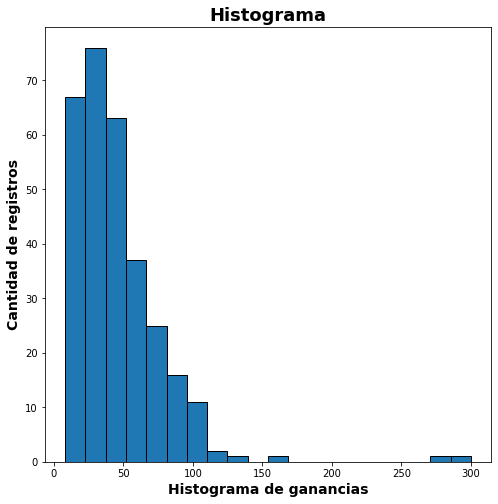

In [41]:
# Cargamos la columna velocidad como variable y a graficar.
y = data['earningsMill']

# Definimos la cantidad de conjuntos que queremos usar para agrupar los valores.
num_bins = 20

# tamaño del grafico: (ancho, largo)
plt.figure(figsize=(8,8))

# Le definimos a Matplotlib que es un histograma con los valores de y agrupados en num_bins
plt.hist(y, num_bins, edgecolor='black')

# Asignamos nombres a eje x, y asi como tambien el titulo del gráfico
plt.xlabel('Histograma de ganancias', fontsize=14, fontweight="bold")
plt.ylabel('Cantidad de registros', fontsize=14, fontweight="bold")
plt.title(r'Histograma', fontsize=18, fontweight="bold")

plt.show()

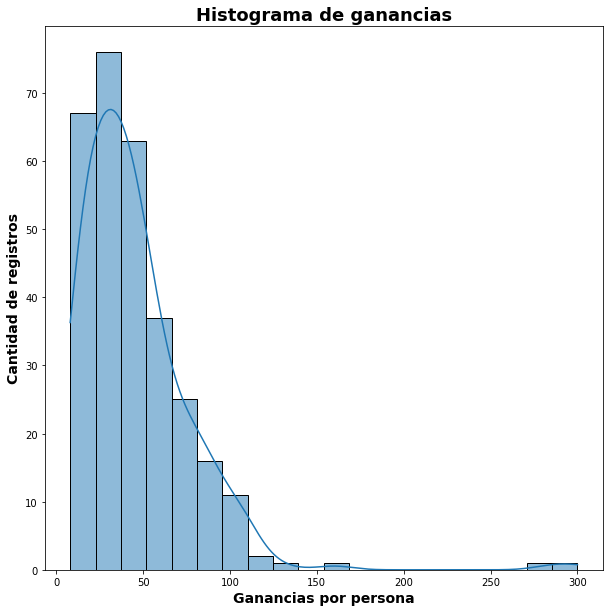

In [42]:
plt.figure(figsize=(10,10))
sns.histplot(data.earningsMill, kde=True, bins = num_bins)
plt.xlabel('Ganancias por persona', fontsize=14, fontweight="bold")
plt.ylabel('Cantidad de registros', fontsize=14, fontweight="bold")
plt.title(r'Histograma de ganancias', fontsize=18, fontweight="bold");

Lo que nos da a conoce este gráfico es que la mayoría de los datos se encuentra a en los rangos menores en temas de ganancias por persona, además de que la distribución no está bien distribuida, más bien esta asimétrica hacia la derecha por lo que significa que hay algunos datos separados a la derecha.

Text(0.5, 1.0, 'Diagrama de caja de datos')

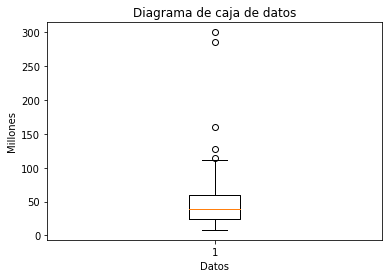

In [43]:
plt.boxplot(data['earningsMill'])
# Agregamos etiquetas y título
plt.xlabel('Datos')
plt.ylabel('Millones')
plt.title('Diagrama de caja de datos')

Este gráfico muestra los datos que están presentes en nuestra columna, precisamente si es que nuestra data hay valores outlayers es decir valores atípicos, es decir que están fuera de la media de los datos, estos se ven representados por los puntos fuera de la caja y estos afecta de manera negativa a nuestra data, ya que al ver datos tan exagerados podría alterar la fiabilidad de la variable.

##*Nationality*

In [44]:
#Frecuencia absoluta
frecuencia_absoluta = data['Nationality'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['Nationality'].value_counts(normalize=True)
#Moda
moda = statistics.mode(data['Nationality'])
moda2 = statistics.multimode(data['Nationality'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que mas se repite es: ',moda)
print('El valor que mas se repite es: ',moda2)

                  Frecuencia absoluta  Frecuencia relativa
USA                               206             0.684385
UK                                 13             0.043189
Germany                            13             0.043189
Switzerland                        12             0.039867
Portugal                           10             0.033223
Brazil                              9             0.029900
Argentina                           9             0.029900
Canada                              6             0.019934
Italy                               4             0.013289
Finland                             3             0.009967
France                              3             0.009967
Philippines                         3             0.009967
Russia                              1             0.003322
Australia                           1             0.003322
Dominican                           1             0.003322
Austria                             1             0.0033

*Interpretacion:* Durante el análisis de esta variable realizamos el cálculo de la frecuencia absoluta y relativa, además de calcular la moda presente en esta columna, a la hora de interpretar los resulta que el valor con mayor frecuencia en la columna es USA con una cantidad de 206 apariciones y con el porcentaje de apariciones de un 0.68 es decir un 68% en relación con los otros datos y para finalizar la moda presente en la variable es USA, ya que tiene mayores repeticiones en la variable.

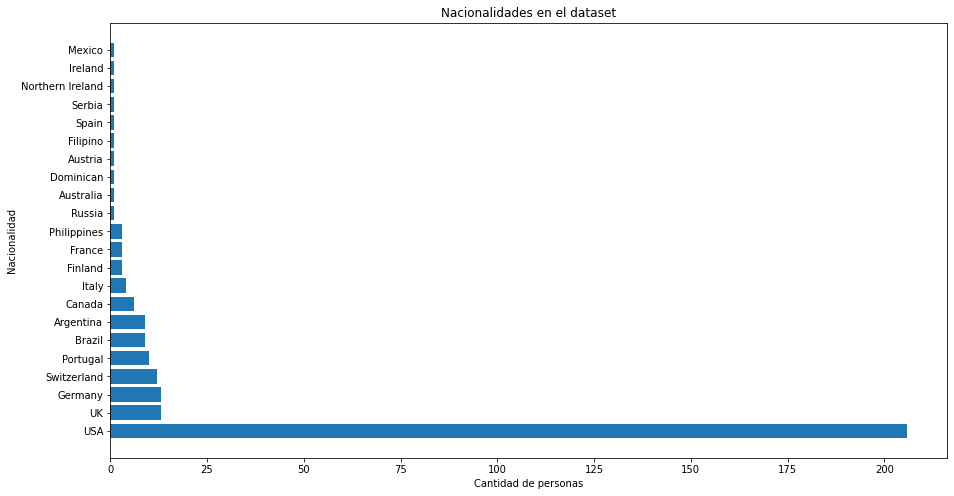

In [45]:
frecuencia = data['Nationality'].value_counts()
# Crear un gráfico horizontal
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(frecuencia.index, frecuencia.values)
ax.set_title('Nacionalidades en el dataset')
ax.set_xlabel('Cantidad de personas')
ax.set_ylabel('Nacionalidad')
plt.show()

Lo que nos indica este gráfico es que la mayoría de los datos está representado por la variable “USA” la cual es la que más se repite.

##*Sports*

In [46]:
#Frecuencia absoluta
frecuencia_absoluta = data['Sport'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['Sport'].value_counts(normalize=True)
#Moda
moda = statistics.mode(data['Sport'])
moda2 = statistics.multimode(data['Sport'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que mas se repite es: ',moda)
print('El valor que mas se repite es: ',moda2)

                   Frecuencia absoluta  Frecuencia relativa
Basketball                          82             0.272425
Boxing                              46             0.152824
Golf                                44             0.146179
Racing                              40             0.132890
Soccer                              33             0.109635
Tennis                              23             0.076412
American Football                   21             0.069767
Baseball                             6             0.019934
Ice Hockey                           3             0.009967
Hockey                               1             0.003322
Cycling                              1             0.003322
MMA                                  1             0.003322
 
El valor que mas se repite es:  Basketball
El valor que mas se repite es:  ['Basketball']


*Interpretacion:* Durante el análisis de esta variable realizamos el cálculo de la frecuencia absoluta y relativa, además de calcular la moda presente en esta columna, a la hora de interpretar los resulta que el valor con mayor frecuencia en la columna es Basketball con una cantidad de 54 apariciones y con el porcentaje de apariciones de un 0.17 es decir un 17% en relación con los otros datos y para finalizar la moda presente en la variable es Basketball, ya que tiene mayores repeticiones en la variable.

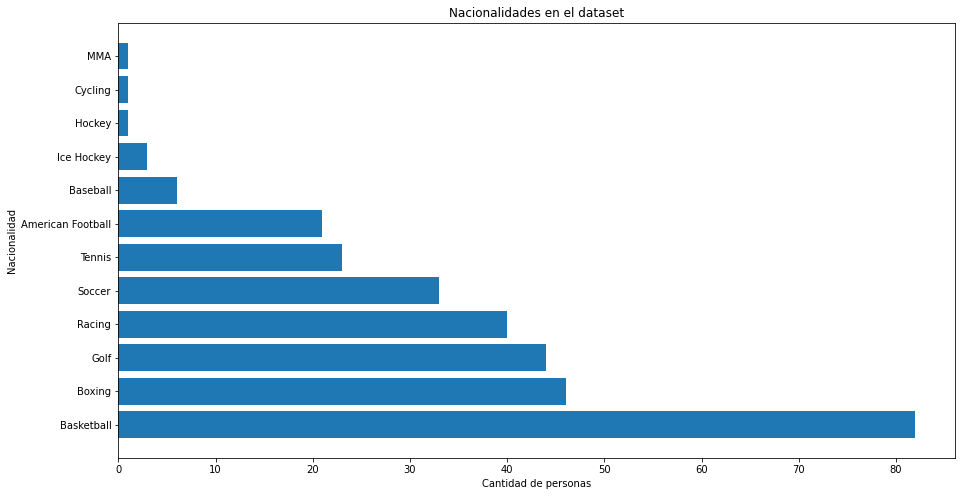

In [47]:
frecuencia = data['Sport'].value_counts()
# Crear un gráfico horizontal
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(frecuencia.index, frecuencia.values)
ax.set_title('Nacionalidades en el dataset')
ax.set_xlabel('Cantidad de personas')
ax.set_ylabel('Nacionalidad')
plt.show()

En el presente gráfico se muestra la cantidad de registros en la variable “Sport” la cual nos indica el deporte que participa cada persona presente en la lista, en este caso la variable que más frecuencia está en la lista es “Basketball”.

##*Name*

In [48]:
#Frecuencia absoluta
frecuencia_absoluta = data['Name'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data['Name'].value_counts(normalize=True)
#Moda
moda = statistics.mode(data['Name'])
moda2 = statistics.multimode(data['Name'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que mas se repite es: ',moda)
print('El valor que mas se repite es: ',moda2)

                    Frecuencia absoluta  Frecuencia relativa
Tiger Woods                          19             0.063123
Michael Jordan                       19             0.063123
Kobe Bryant                          14             0.046512
LeBron James                         13             0.043189
Michael Schumacher                   13             0.043189
...                                 ...                  ...
Tom Brady                             1             0.003322
Michael Moorer                        1             0.003322
Dale Earnhardt Jr.                    1             0.003322
Greg Norman                           1             0.003322
Carson Wentz                          1             0.003322

[82 rows x 2 columns]
 
El valor que mas se repite es:  Michael Jordan
El valor que mas se repite es:  ['Michael Jordan', 'Tiger Woods']


*Interpretacion:* Durante el análisis de esta variable realizamos el cálculo de la frecuencia absoluta y relativa, además de calcular la moda presente en esta columna, a la hora de interpretar los resulta que el valor con mayor frecuencia en la columna es **Michael Jordan y Tiger Woods** con una cantidad de 19 apariciones y con el porcentaje de apariciones de un 0.063 y para finalizar la moda presente en la variable es **Michael Jordan y Tiger Woods**, ya que ambos tienen las mayores repeticiones en la variable.

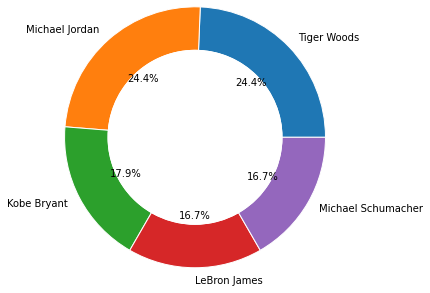

In [49]:
frecuencia = data['Name'].value_counts()
top3 = frecuencia[:5]
fig, ax = plt.subplots()
ax.pie(top3.values, labels=top3.index,autopct='%2.1f%%', radius=1.5, wedgeprops=dict(width=0.5, edgecolor='w'))
circle = plt.Circle((0, 0), 1.0, color='white')
ax.add_artist(circle)
plt.show()

Lo que muestra este gráfico de dona es el porcentaje distribuido en los primeros cinco lugares en la lista, en cuál Michael Jordan y Tiger Woods comparten la misma cantidad de porcentaje, ya que más son los que frecuentan más en la lista.

#Tranformar variable earnings en cualitativa

In [50]:
earningsCategorico = pd.cut(data['earningsMill'], bins=[0,70,170,250,300], 
                            labels=['<70M', '70M-170M', '170M-250M', '250M-300M'])
data['earningsMill'] = earningsCategorico

In [51]:
earnings_counts = data['earningsMill'].value_counts()

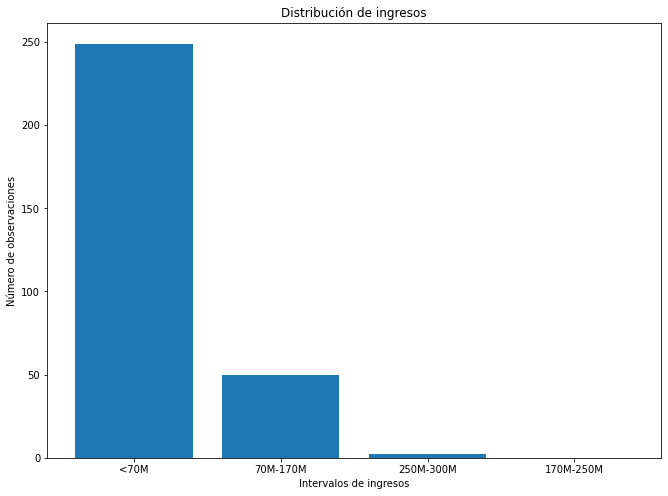

In [52]:
fig, ax = plt.subplots(figsize=(11,8))
plt.bar(earnings_counts.index, earnings_counts.values)
plt.title('Distribución de ingresos')
plt.xlabel('Intervalos de ingresos')
plt.ylabel('Número de observaciones')
plt.show()

La Interpretación lo que nos entrega este dato o lo que nos da a entender es que los datos que ese encuentra entre el 0 y los 70 millones es la más representativa en comparación a los otros intervalos, el segundo que más frecuencia tiene es el rango entre los 70 millones y los 170 millones y por último el rango que tiene menos frecuencia en la columna se encuentra entre el rango entre 170 millones y 250 millones.

#Preguntas finales

In [53]:
#Pregunta 1
indice_max = data['earningsMill'].idxmax()
indice_max_dinero = data['earningsMill'].idxmax()
nombre_max = data.loc[indice_max, 'Name']

# Imprimir el nombre de la persona con el ingreso más alto
print("La persona que más ganó en un año fue:", nombre_max, "con", indice_max_dinero,"Millones")

La persona que más ganó en un año fue: Floyd Mayweather con 241 Millones


In [54]:
#Pregunta 2
moda_deporte = statistics.mode(data['Sport'])
print("El deporte que mas se repite en la lista es:",moda_deporte)

El deporte que mas se repite en la lista es: Basketball


In [55]:
#Pregunta 3
indice_max = data['earningsMill'].idxmax()
deporte_max = data.loc[indice_max, 'Sport']

# Imprimir el nombre del deporte con mayores ganancias
print("El deporte que más gana es el:", deporte_max)

El deporte que más gana es el: Boxing


In [57]:
#Pregunta propia
indice_max = data['earningsMill'].idxmax()
deporte_max = data.loc[indice_max, 'Nationality']

# Imprimir el nombre del deporte con mayores ganancias
print("El pais que más ganancias genera es:", deporte_max)

El pais que más ganancias genera es: USA


#Conclusiones finales

Después de realizar la limpieza de datos y el cálculo de variables básicas de estadísticas, se puede concluir que los datos han sido procesados de manera efectiva para obtener una comprensión más clara y precisa de la información.

La limpieza de datos implica eliminar datos irrelevantes, corregir errores, manejar valores faltantes y estandarizar los datos para que sean comparables. Este proceso es esencial para garantizar que los resultados del análisis sean confiables y precisos.

El cálculo de variables básicas de estadísticas, como la media, la mediana, la moda y la desviación estándar, proporciona información sobre la distribución de los datos y la medida de su variabilidad. Estos cálculos pueden ayudar a identificar patrones y tendencias en los datos, y a proporcionar información valiosa para la toma de decisiones en diferentes contextos.

En resumen, la limpieza de datos y el cálculo de variables básicas de estadísticas son procesos esenciales en el análisis de datos. Estos procesos aseguran que los datos sean precisos, confiables y comprensibles, lo que permite una mejor toma de decisiones en diferentes contextos.